In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load the dataset
data = pd.read_csv('wine_quality.csv')

# Remove duplicates
data = data.drop_duplicates()

# Handle missing values (if any)
data = data.dropna()

# Display the head of the cleaned data
print("Head of the cleaned dataset:")
print(data.head())


Head of the cleaned dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1    

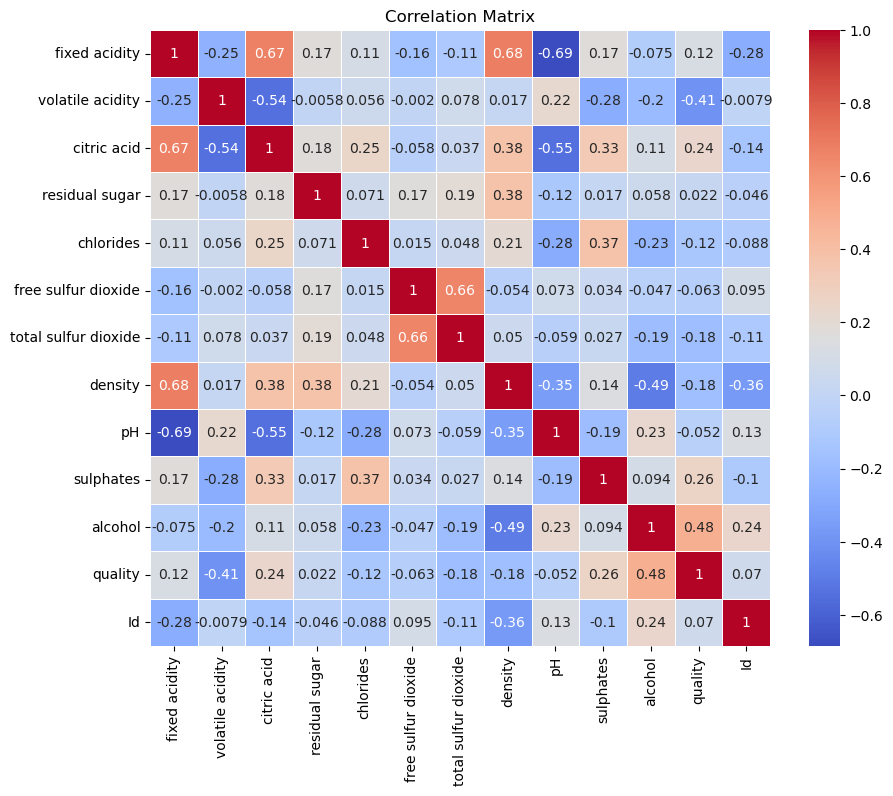

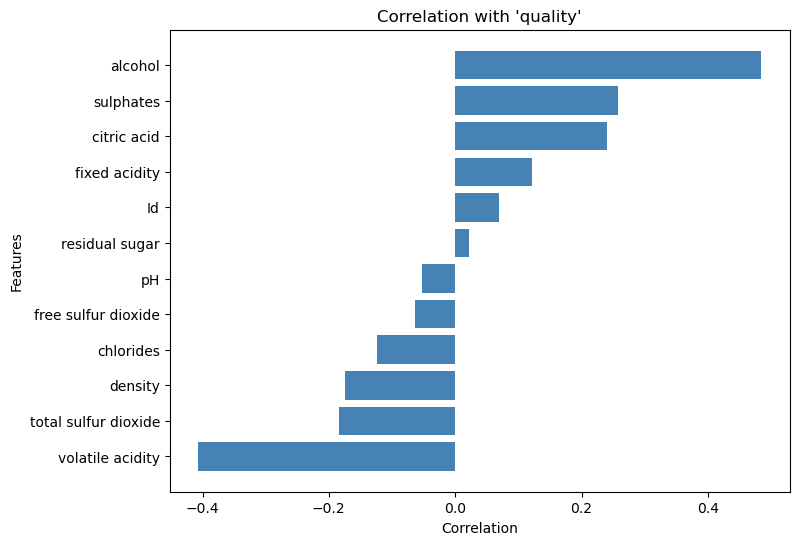

In [6]:
# Generate correlation matrix
corr_matrix = data.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Calculate the correlation with 'quality'
corr_with_quality = data.corr()['quality'].drop('quality')

# Sort the correlation values in ascending order
sorted_corr = corr_with_quality.sort_values()

# Create a horizontal bar plot for correlation with 'quality'
plt.figure(figsize=(8, 6))
plt.barh(sorted_corr.index, sorted_corr.values, color='steelblue')
plt.title("Correlation with 'quality'")
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

In [7]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('quality', axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=data.drop('quality', axis=1).columns)

# Feature selection
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(data_scaled, data['quality'])

# Split the data into features (X) and target variable (y)
X = X_selected
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Naive Bayes Accuracy: 0.611353711790393
Random Forest Accuracy: 0.6724890829694323
SVM Accuracy: 0.6157205240174672


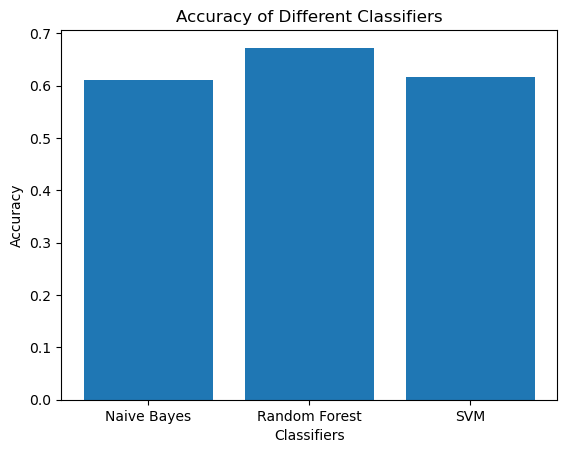

In [9]:
# Naive Bayes Classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
nb_accuracy = naive_bayes.score(X_test, y_test)
print("\nNaive Bayes Accuracy:", nb_accuracy)

# Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
rf_accuracy = random_forest.score(X_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)

# Support Vector Machine (SVM) Classifier
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
svm_accuracy = svm_classifier.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)

# Visualization
classifiers = ['Naive Bayes', 'Random Forest', 'SVM']
accuracies = [nb_accuracy, rf_accuracy, svm_accuracy]

plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.show()

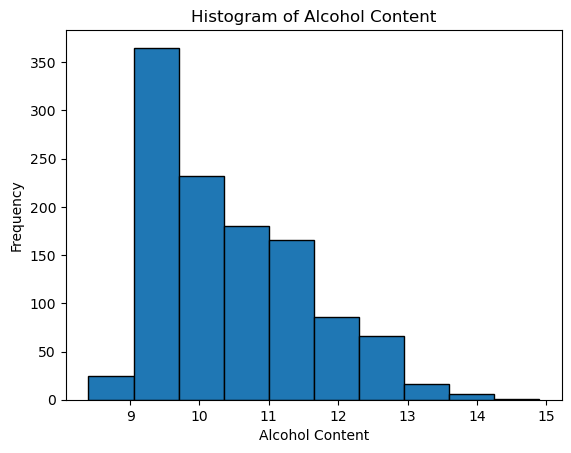

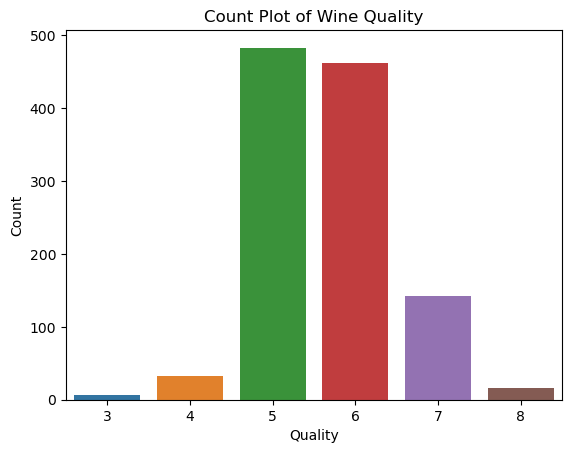

In [10]:

plt.hist(data['alcohol'], bins=10, edgecolor='black')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.title('Histogram of Alcohol Content')
plt.show()

sns.countplot(x='quality', data=data)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Count Plot of Wine Quality')
plt.show()

Scatter Plot Matrix

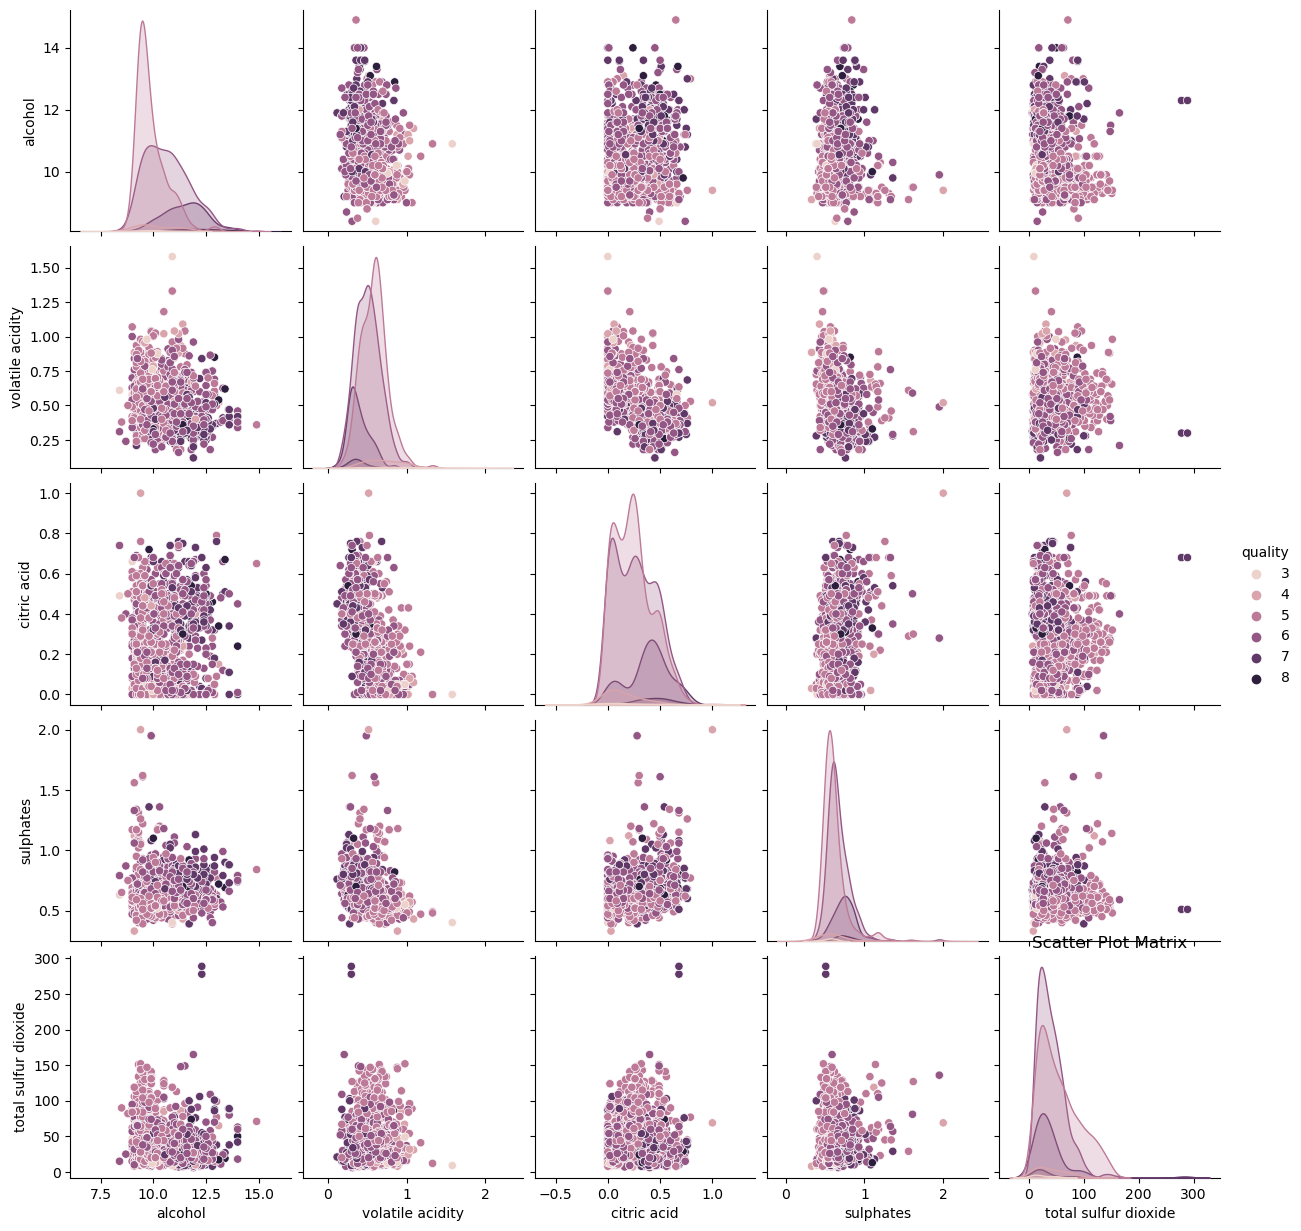

In [13]:
sns.pairplot(data, vars=['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'total sulfur dioxide'], hue='quality')
plt.title('Scatter Plot Matrix')
plt.show()

Violin Plot of Wine Quality by pH:

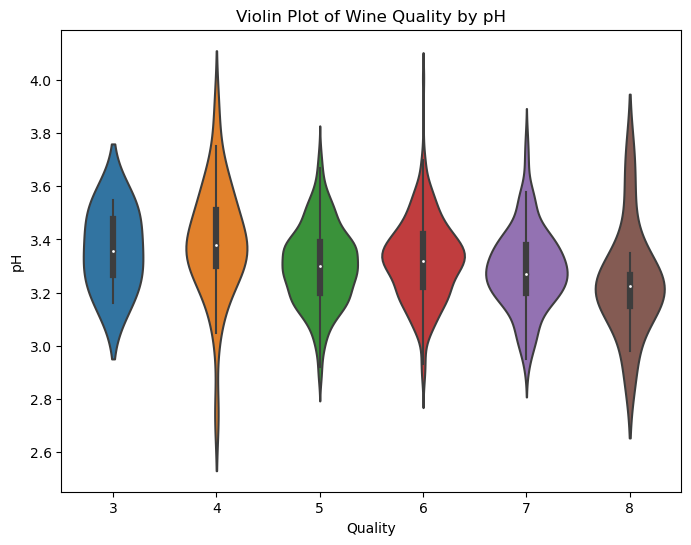

In [14]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='quality', y='pH', data=data)
plt.xlabel('Quality')
plt.ylabel('pH')
plt.title('Violin Plot of Wine Quality by pH')
plt.show()

Bar Plot of Average Wine Quality by Wine Type

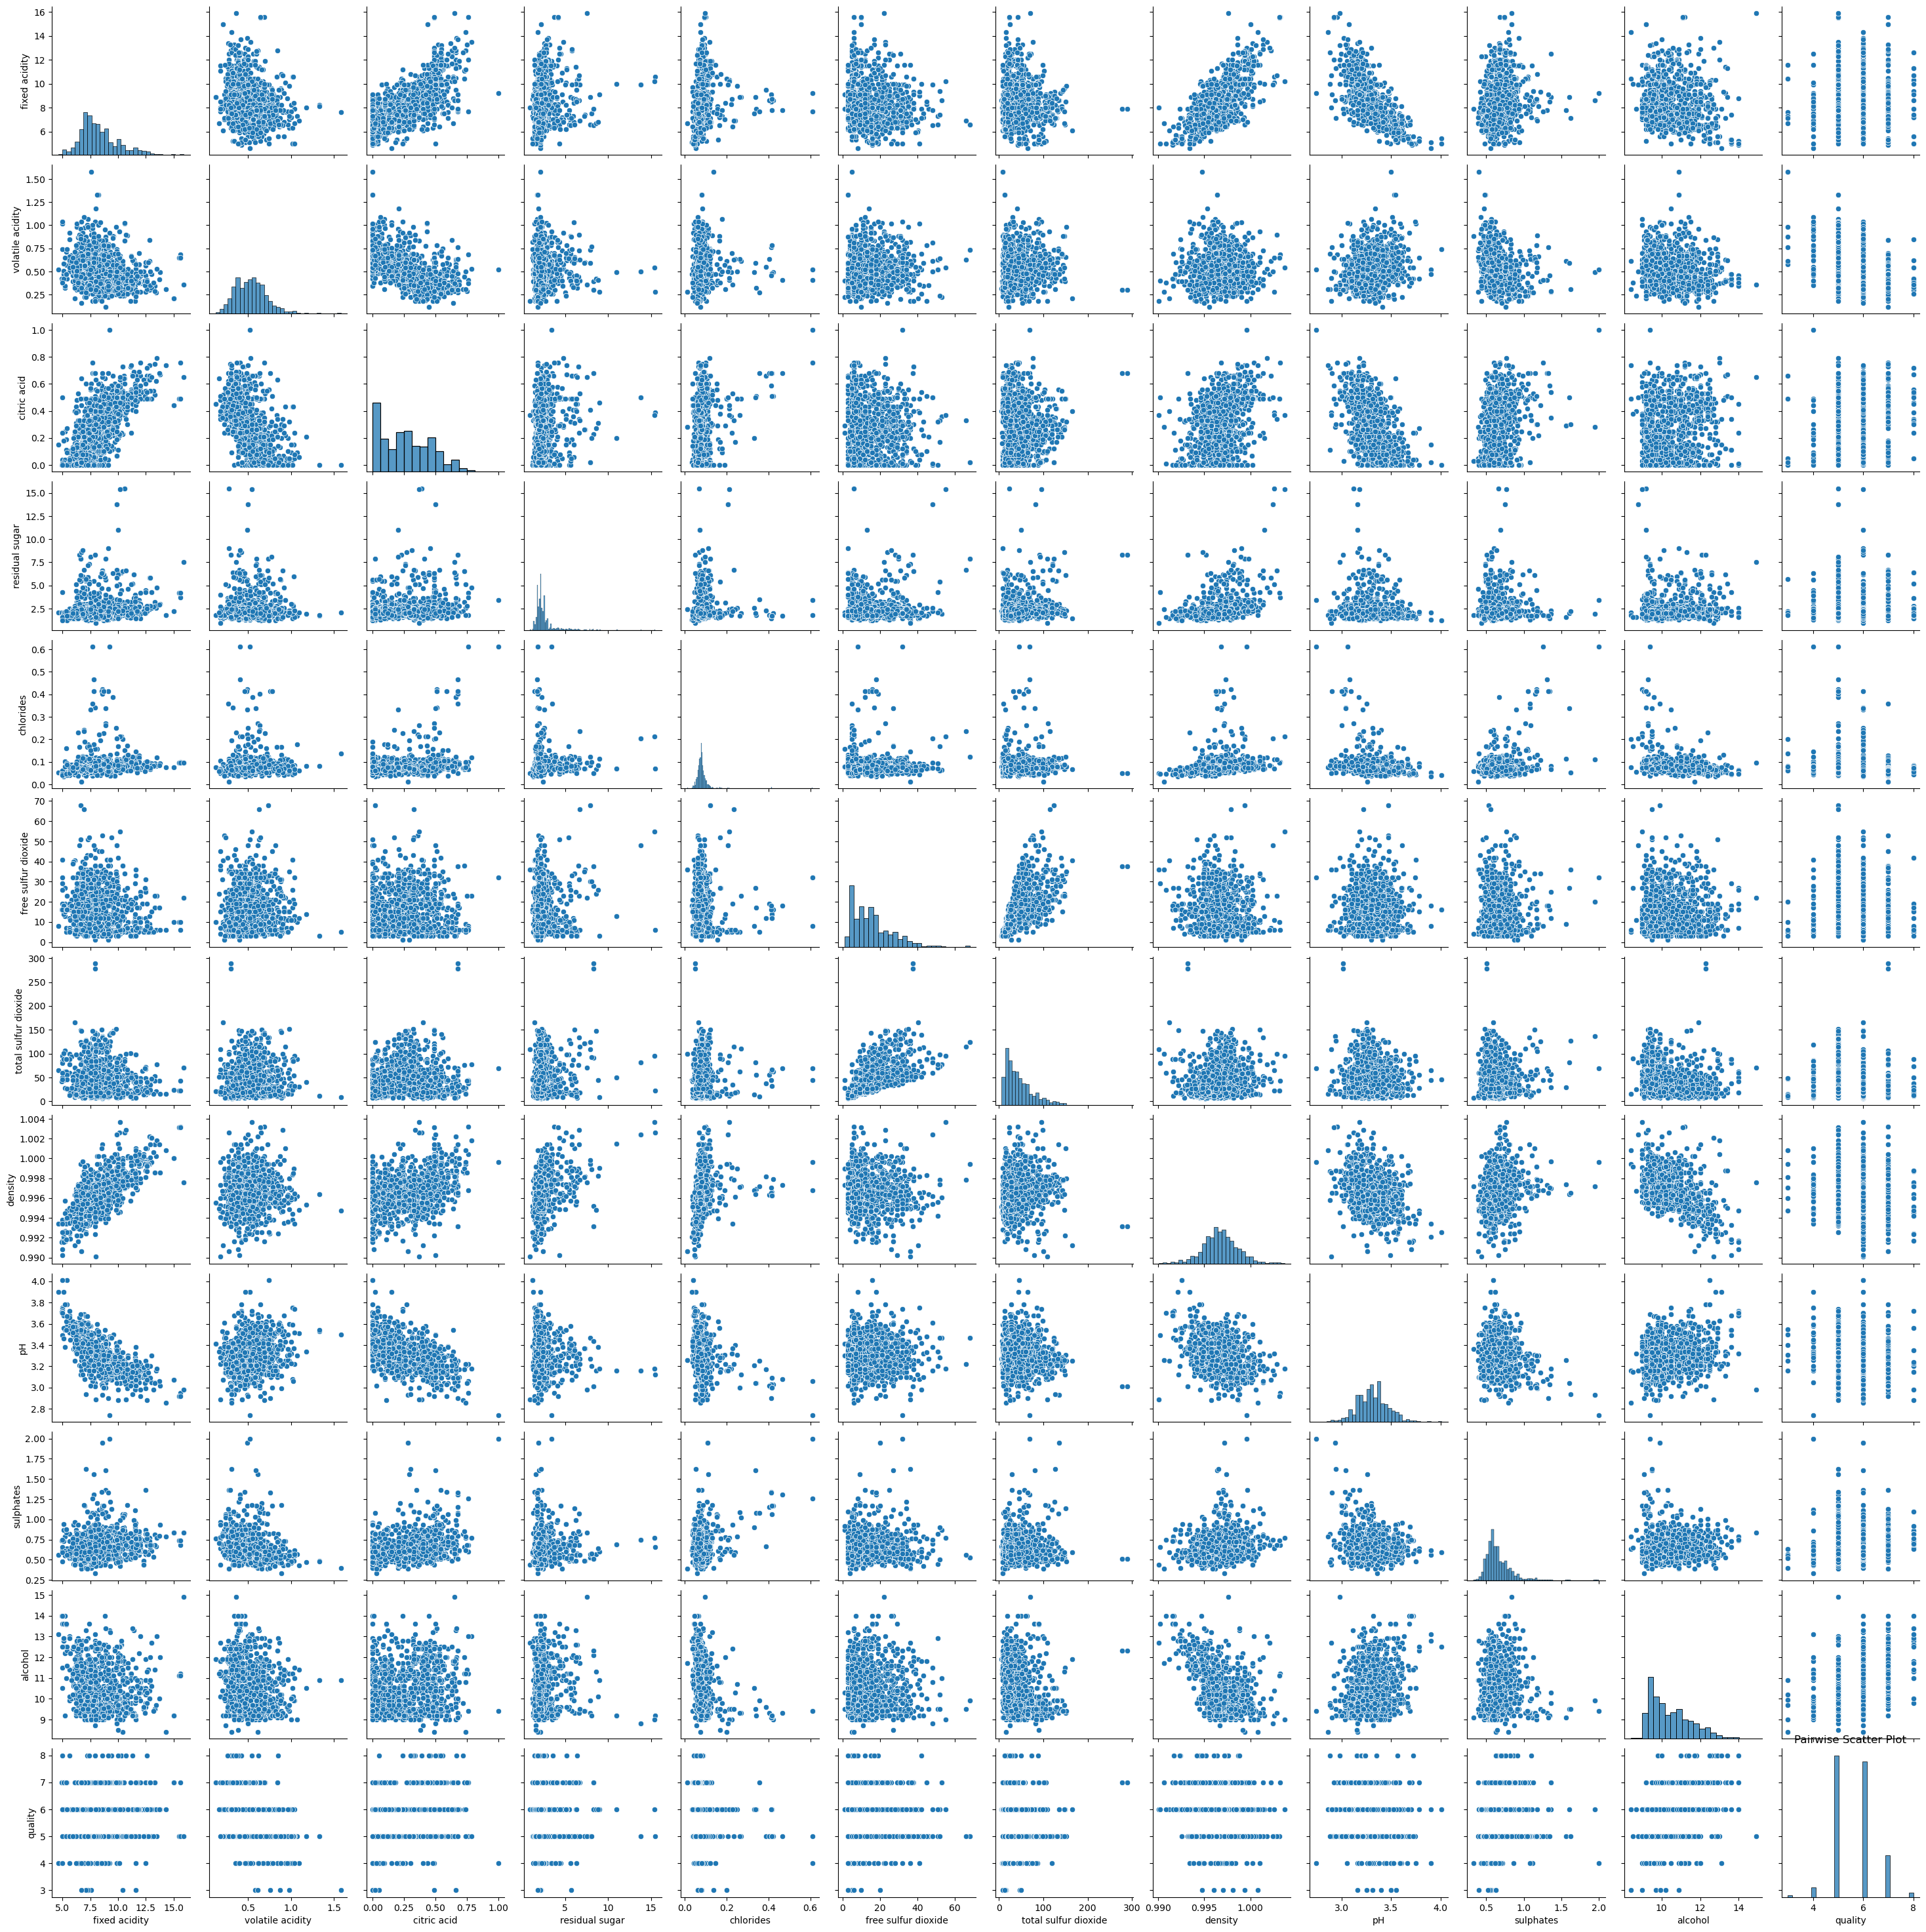

In [18]:
sns.pairplot(data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                   'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']])
plt.title('Pairwise Scatter Plot')
plt.show()
